In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.8 MB/s eta 0:00:00


In [ ]:
# Importa a biblioteca pandas, usada para manipulação e análise de dados.
import pandas as pd

# Importa a biblioteca numpy, usada para manipulação de arrays e operações numéricas.
import numpy as np

# Importa a biblioteca pyplot do matplotlib, usada para criar gráficos.
from matplotlib import pyplot as plt

# Importa a biblioteca seaborn, que é uma extensão do matplotlib para criar gráficos mais atraentes e informativos.
import seaborn as sns

# Importando a biblioteca math para funções matemáticas.
import math

# Importa a função train_test_split para dividir os dados em conjuntos de treino e teste.
from sklearn.model_selection import train_test_split

# Importa a biblioteca preprocessing para utilizar o MinMaxScaler e StandardScaler, usados para normalização e padronização de dados.
from sklearn.preprocessing import StandardScaler

# Importa o category_encoders, que fornece várias técnicas para codificação de variáveis categóricas.
import category_encoders as ce

# Importa a biblioteca Pipeline para construir fluxos de trabalho de machine learning com pré-processamento e modelos.
from sklearn.pipeline import Pipeline

# Importa a classe LogisticRegression para aplicar a regressão logística.
from sklearn.linear_model import LogisticRegression

# Importa a classe RandomForestClassifier para aplicar a classificação usando Random Forest.
from sklearn.ensemble import RandomForestClassifier

# Importa a classe DecisionTreeClassifier para aplicar a classificação usando árvore de decisão.
from sklearn.tree import DecisionTreeClassifier

# Importa as métricas roc_auc_score, confusion_matrix e classification_report para avaliar o desempenho do modelo.
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


# Importa o GridSearchCV para realizar a busca em grade de hiperparâmetros para o modelo.
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importa a biblioteca _pickle para serialização e desserialização de objetos.
import _pickle as cPickle

# Importa joblib, usado para salvar e carregar modelos de forma eficiente.
import joblib

# Importa a biblioteca de warnings para controlar a exibição de mensagens de aviso.
import warnings

# Ignora todas as mensagens de aviso, evitando que apareçam no terminal durante a execução do código.
warnings.filterwarnings("ignore")

# Configurações do pandas para melhor visualização dos dados:

# Exibe todo o conteúdo da célula, sem truncamento.
pd.set_option('display.max_colwidth', None)

# Evita que quebre a linha automaticamente ao exibir dataframes grandes.
pd.set_option('display.expand_frame_repr', False)

# Aumenta a largura do display para acomodar mais informações.
pd.set_option('display.width', 300)


In [ ]:
# 1. Criação do dicionário com as informações do seu dataset
dictionary_acidentes = {
    "municipio": ("Município da ocorrência.", "Categórico, nome do município."),
    "br": ("Rodovia federal (BR) da ocorrência.", "Categórico, número da BR."),
    "km": ("Quilômetro da rodovia onde o acidente ocorreu.", "Numérico, marcação da via."),
    "ano": ("Ano da ocorrência.", "Numérico, representa o ano."),
    "mes": ("Mês da ocorrência.", "Numérico, representa o mês."),
    "qtd_acidentes": ("Quantidade total de acidentes.", "Numérico, contagem de acidentes para o local/período."),
    "qtd_mortos": ("Quantidade total de mortos.", "Numérico, contagem de mortos para o local/período."),
    "qtd_feridos_graves": ("Quantidade total de feridos graves.", "Numérico, contagem de feridos graves."),
    "qtd_feridos_leves": ("Quantidade total de feridos leves.", "Numérico, contagem de feridos leves."),
    "media_idade_envolvidos": ("Idade média das pessoas envolvidas.", "Numérico, média de idade."),
    "proporcao_noite": ("Razão entre acidentes totais e os ocorridos à noite.", "Numérico, proporção de 0 a 1."),
    "proporcao_dia_semana_fds": ("Razão entre acidentes totais e os ocorridos no fim de semana.", "Numérico, proporção de 0 a 1."),
    "clima_ruim": ("Razão entre acidentes totais e os ocorridos sob clima adverso.", "Numérico, proporção de 0 a 1."),
    "frequencia_feriado": ("Razão entre acidentes totais e os ocorridos em feriados.", "Numérico, proporção de 0 a 1."),
    "qtd_infracoes": ("Quantidade de infrações registradas no local.", "Numérico, contagem de infrações.")
}

# 2. Criação do DataFrame a partir do dicionário
dict_df_acidentes = pd.DataFrame(dictionary_acidentes.items(), columns=["Variável", "Info"])

# 3. Separação da coluna "Info" em "Descrição" e "Categorias"
dict_df_acidentes["Descrição"] = dict_df_acidentes["Info"].apply(lambda x: x[0])
dict_df_acidentes["Categorias"] = dict_df_acidentes["Info"].apply(lambda x: x[1])

# 4. Adição da coluna "Tipo" para indicar se a variável é Numérica ou Categórica
# Identificamos as variáveis que não são numéricas
variaveis_categoricas = ["municipio", "br"]
dict_df_acidentes["Tipo"] = dict_df_acidentes["Variável"].apply(lambda x: "Categórica" if x in variaveis_categoricas else "Numérica")

# 5. Remoção da coluna auxiliar "Info"
dict_df_acidentes.drop(columns=["Info"], inplace=True)

# 6. Exibição do DataFrame resultante
# Para uma melhor visualização no notebook, você pode usar display() ou simplesmente chamar a variável no final.
display(dict_df_acidentes)

,Variável,Descrição,Categorias,Tipo
0,municipio,Município da ocorrência.,"Categórico, nome do município.",Categórica
1,br,Rodovia federal (BR) da ocorrência.,"Categórico, número da BR.",Categórica
2,km,Quilômetro da rodovia onde o acidente ocorreu.,"Numérico, marcação da via.",Numérica
3,ano,Ano da ocorrência.,"Numérico, representa o ano.",Numérica
4,mes,Mês da ocorrência.,"Numérico, representa o mês.",Numérica
5,qtd_acidentes,Quantidade total de acidentes.,"Numérico, contagem de acidentes para o local/período.",Numérica
6,qtd_mortos,Quantidade total de mortos.,"Numérico, contagem de mortos para o local/período.",Numérica
7,qtd_feridos_graves,Quantidade total de feridos graves.,"Numérico, contagem de feridos graves.",Numérica
8,qtd_feridos_leves,Quantidade total de feridos leves.,"Numérico, contagem de feridos leves.",Numérica
9,media_idade_envolvidos,Idade média das pessoas envolvidas.,"Numérico, média de idade.",Numérica


In [ ]:
 # Lista de nomes das colunas

columns = [
    "municipio",
    "br",
    "km",
    "ano",
    "mes",
    "qtd_acidentes",
    "qtd_mortos",
    "qtd_feridos_graves",
    "qtd_feridos_leves",
    "media_idade_envolvidos",
    "proporcao_noite",
    "proporcao_dia_semana_fds",
    "clima_ruim",
    "frequencia_feriado",
    "qtd_infracoes",
]

# Ler os dados a partir do arquivo

df = pd.read_csv("/content/drive/MyDrive/MBA_HANDS_ON_01/ml_acidentes_mensal_CERTA.csv", sep=',', low_memory=False, names=columns)  # Carrega os dados separados por espaços e define os nomes das colunas

# Exibir as 5 primeiras linhas do DataFrame para verificar a estrutura dos dados
df.head()

,municipio,br,km,ano,mes,qtd_acidentes,qtd_mortos,qtd_feridos_graves,qtd_feridos_leves,media_idade_envolvidos,proporcao_noite,proporcao_dia_semana_fds,clima_ruim,frequencia_feriado,qtd_infracoes
0,municipio,br,km,ano,mes,qtd_acidentes,qtd_mortos,qtd_feridos_graves,qtd_feridos_leves,media_idade_envolvidos,proporcao_noite,proporcao_dia_semana_fds,clima_ruim,frequencia_feriado,qtd_infracoes
1,ARAGUARI,50,"19,2",2024,6,1,0,0,1,22.25,1.0,0.0,0.0,0,0
2,APARECIDA,116,"74,5",2024,2,2,0,0,3,27.714285714285715,0.0,0.0,0.5,0,0
3,GOIANIA,153,"507,3",2024,5,1,0,0,2,30.285714285714285,1.0,0.0,0.0,0,0
4,TRES DE MAIO,472,143,2024,4,1,0,0,1,0.0,1.0,0.0,0.0,0,0


In [ ]:
print( 'Número de instâncias do dataset : {}'.format( df.shape[0] ) )
print( 'Número de atributos do dataset: {}'.format( df.shape[1] ) )

Número de instâncias do dataset : 83932
Número de atributos do dataset: 15


In [ ]:
df.shape

(83932, 15)

In [ ]:
print(df.dtypes)

municipio                   object
br                          object
km                          object
ano                         object
mes                         object
qtd_acidentes               object
qtd_mortos                  object
qtd_feridos_graves          object
qtd_feridos_leves           object
media_idade_envolvidos      object
proporcao_noite             object
proporcao_dia_semana_fds    object
clima_ruim                  object
frequencia_feriado          object
qtd_infracoes               object
dtype: object


In [ ]:
# Lista de colunas para converter para o tipo numérico
colunas_para_converter = [
    'br', 'km', 'ano', 'mes', 'qtd_acidentes', 'qtd_mortos',
    'qtd_feridos_graves', 'qtd_feridos_leves', 'media_idade_envolvidos',
    'proporcao_noite', 'proporcao_dia_semana_fds', 'clima_ruim',
    'frequencia_feriado', 'qtd_infracoes'
]

In [ ]:
# Itera sobre a lista de colunas e aplica a conversão em cada uma
for coluna in colunas_para_converter:
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

print("Conversão concluída!")

Conversão concluída!


In [ ]:
print(df.dtypes)

municipio                    object
br                          float64
km                          float64
ano                         float64
mes                         float64
qtd_acidentes               float64
qtd_mortos                  float64
qtd_feridos_graves          float64
qtd_feridos_leves           float64
media_idade_envolvidos      float64
proporcao_noite             float64
proporcao_dia_semana_fds    float64
clima_ruim                  float64
frequencia_feriado          float64
qtd_infracoes               float64
dtype: object


In [ ]:
# verifica linhas duplicadas

df.duplicated().sum()

np.int64(15)

In [ ]:
y = df['qtd_acidentes'] # variável resposta
X = df
X = df.drop('qtd_acidentes',axis = 1) # variáveis explicativas
X
X.shape, y.shape

((83932, 14), (83932,))

In [ ]:
print("--- ETAPA 1: LIMPANDO VALORES NaN ---")
print(f"Tamanho original de X: {X.shape}")
print(f"Tamanho original de y: {y.shape}")
print(f"Valores nulos em 'y' antes da limpeza: {y.isnull().sum()}")

# Mantemos apenas as linhas onde 'y' não é nulo.
# O .loc garante que os índices de X e y permaneçam alinhados.
X_limpo = X.loc[y.notnull()]
y_limpo = y.loc[y.notnull()]

print(f"Tamanho de X após limpeza de NaN: {X_limpo.shape}")
print(f"Tamanho de y após limpeza de NaN: {y_limpo.shape}")
print("-" * 40)


# --- PASSO 2: REMOÇÃO DE CLASSES RARAS (COM APENAS 1 MEMBRO) ---
# Com os dados já sem NaN, agora podemos tratar as classes raras.

print("--- ETAPA 2: REMOVENDO CLASSES RARAS ---")
contagem_classes = y_limpo.value_counts()
classes_raras = contagem_classes[contagem_classes == 1].index.tolist()

if classes_raras:
    print(f"Encontradas {len(classes_raras)} classes com apenas 1 membro. Removendo...")
    # O '~' faz a negação, mantendo tudo que NÃO está na lista de classes raras
    X_final = X_limpo[~y_limpo.isin(classes_raras)]
    y_final = y_limpo[~y_limpo.isin(classes_raras)]
else:
    print("Nenhuma classe com apenas 1 membro foi encontrada.")
    X_final = X_limpo
    y_final = y_limpo

print(f"Tamanho final de X para o split: {X_final.shape}")
print(f"Tamanho final de y para o split: {y_final.shape}")
print("-" * 40)


# --- PASSO 3: DIVISÃO ESTRATIFICADA (TRAIN/TEST SPLIT) ---
# Agora, com o dataset totalmente limpo, a divisão funcionará corretamente.

print("--- ETAPA 3: FAZENDO A DIVISÃO TREINO/TESTE ---")
X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y_final,
    test_size=0.3,       # Define 30% dos dados para teste
    random_state=42,     # Garante que a divisão seja sempre a mesma
    stratify=y_final     # Garante a proporção das classes nos dados de treino e teste
)

print("Divisão concluída com sucesso!")
print(f"Observações no conjunto de treino: {len(X_train)}")
print(f"Observações no conjunto de teste: {len(X_test)}")
print(f"Total de observações: {len(X_train) + len(X_test)}")

# Proporções finais para verificação
print('Proporção -> Treino: {}% | Teste: {}%'.format(
    round(len(y_train) / len(y_final), 2) * 100,
    round(len(y_test) / len(y_final), 2) * 100
))

--- ETAPA 1: LIMPANDO VALORES NaN ---
Tamanho original de X: (83932, 14)
Tamanho original de y: (83932,)
Valores nulos em 'y' antes da limpeza: 1
Tamanho de X após limpeza de NaN: (83931, 14)
Tamanho de y após limpeza de NaN: (83931,)
----------------------------------------
--- ETAPA 2: REMOVENDO CLASSES RARAS ---
Encontradas 1 classes com apenas 1 membro. Removendo...
Tamanho final de X para o split: (83930, 14)
Tamanho final de y para o split: (83930,)
----------------------------------------
--- ETAPA 3: FAZENDO A DIVISÃO TREINO/TESTE ---
Divisão concluída com sucesso!
Observações no conjunto de treino: 58751
Observações no conjunto de teste: 25179
Total de observações: 83930
Proporção -> Treino: 70.0% | Teste: 30.0%


In [ ]:
df_treino = pd.concat([X_train,y_train], axis = 1)

In [ ]:
df_treino.shape

(58751, 15)

In [ ]:
df_treino.head(2)

,municipio,br,km,ano,mes,qtd_mortos,qtd_feridos_graves,qtd_feridos_leves,media_idade_envolvidos,proporcao_noite,proporcao_dia_semana_fds,clima_ruim,frequencia_feriado,qtd_infracoes,qtd_acidentes
24019,TEIXEIRA SOARES,277.0,230.0,2025.0,3.0,0.0,0.0,0.0,46.823529,0.5,0.5,0.0,0.0,0.0,2.0
11072,GOVERNADOR VALADARES,116.0,410.0,2024.0,11.0,0.0,0.0,1.0,48.500000,1.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
pd.DataFrame.info(df_treino);

<class 'pandas.core.frame.DataFrame'>
Index: 58751 entries, 24019 to 45926
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   municipio                 58751 non-null  object 
 1   br                        58598 non-null  float64
 2   km                        34285 non-null  float64
 3   ano                       58751 non-null  float64
 4   mes                       58751 non-null  float64
 5   qtd_mortos                58751 non-null  float64
 6   qtd_feridos_graves        58751 non-null  float64
 7   qtd_feridos_leves         58751 non-null  float64
 8   media_idade_envolvidos    58751 non-null  float64
 9   proporcao_noite           58598 non-null  float64
 10  proporcao_dia_semana_fds  58598 non-null  float64
 11  clima_ruim                58598 non-null  float64
 12  frequencia_feriado        58598 non-null  float64
 13  qtd_infracoes             58751 non-null  float64
 14  qtd_aci

In [ ]:
# separando em listas: variáveis numéricas e categóricas
num_vars = df_treino.select_dtypes(include=['number']).columns.tolist()  # Seleciona as colunas com tipo numérico
num_vars = num_vars[:-2]  # Remover a target (coluna de classe ou resultado) da lista de variáveis numéricas

cat_vars = df_treino.select_dtypes(exclude=['number']).columns.tolist()  # Seleciona as colunas que não são numéricas (categóricas)

# Exibindo os resultados
print("Variáveis Numéricas:", num_vars)  # Imprime as variáveis numéricas
print("Variáveis Categóricas:", cat_vars)  # Imprime as variáveis categóricas
print("Qtd Variáveis Numéricas:", len(num_vars))  # Imprime a quantidade de variáveis numéricas
print("Qtd Variáveis Categóricas:", len(cat_vars))  # Imprime a quantidade de variáveis categóricas
print("Variável Resposta:", df.qtd_acidentes.dtypes)  # Imprime o tipo da variável resposta

Variáveis Numéricas: ['br', 'km', 'ano', 'mes', 'qtd_mortos', 'qtd_feridos_graves', 'qtd_feridos_leves', 'media_idade_envolvidos', 'proporcao_noite', 'proporcao_dia_semana_fds', 'clima_ruim', 'frequencia_feriado']
Variáveis Categóricas: ['municipio']
Qtd Variáveis Numéricas: 12
Qtd Variáveis Categóricas: 1
Variável Resposta: float64


In [ ]:
# Calcular percentual de valores ausentes e zeros para cada variável

# Percentual de valores ausentes (NaN) para cada variável
missing_percent = df_treino.isnull().mean() * 100  # O método isnull() retorna um DataFrame booleano onde True indica valores ausentes. Mean() calcula a média (porcentagem) de valores ausentes.

# Percentual de zeros para cada variável
zeros_percent = (df_treino == 0).mean() * 100  # O código (df == 0) cria um DataFrame booleano, onde True representa zeros. Mean() calcula a porcentagem de zeros.

# Criar um DataFrame para mostrar os resultados de valores ausentes e zeros
missing_zeros_df = pd.DataFrame({
    'features': df_treino.columns,  # Coluna com o nome das variáveis
    'missing': missing_percent,  # Coluna com percentual de valores ausentes
    'zeros': zeros_percent  # Coluna com percentual de zeros
})

# Resetando o índice para garantir que não haja problemas com duplicação de colunas
missing_zeros_df.reset_index(drop=True, inplace=True)

# Ordenar o DataFrame pelas variáveis com maior percentual de valores ausentes
missing_zeros_df = missing_zeros_df.sort_values(by='missing', ascending=False)  # Ordena o DataFrame pela coluna 'missing', de forma decrescente.

# Exibir o DataFrame corrigido com a coluna 'features' com o nome correto
missing_zeros_df = missing_zeros_df[['features', 'missing', 'zeros']]  # Selecionando apenas as colunas desejadas

# Exibir o DataFrame final
missing_zeros_df

,features,missing,zeros
2,km,41.643546,0.246804
1,br,0.260421,0.000000
10,proporcao_dia_semana_fds,0.260421,49.721707
11,clima_ruim,0.260421,83.705809
12,frequencia_feriado,0.260421,99.739579
9,proporcao_noite,0.260421,57.200728
0,municipio,0.000000,0.000000
6,qtd_feridos_graves,0.000000,75.020000
5,qtd_mortos,0.000000,91.904819
4,mes,0.000000,0.000000


In [ ]:
df_treino['qtd_acidentes'].value_counts()

,count
qtd_acidentes,
1.0,52867
2.0,4398
3.0,969
4.0,326
5.0,113
6.0,48
7.0,16
8.0,11
11.0,2


In [ ]:
df_treino['qtd_acidentes'].value_counts(normalize=True)

,proportion
qtd_acidentes,
1.0,0.899849
2.0,0.074858
3.0,0.016493
4.0,0.005549
5.0,0.001923
6.0,0.000817
7.0,0.000272
8.0,0.000187
11.0,0.000034


In [ ]:
df_treino.head(2)

,municipio,br,km,ano,mes,qtd_mortos,qtd_feridos_graves,qtd_feridos_leves,media_idade_envolvidos,proporcao_noite,proporcao_dia_semana_fds,clima_ruim,frequencia_feriado,qtd_infracoes,qtd_acidentes
24019,TEIXEIRA SOARES,277.0,230.0,2025.0,3.0,0.0,0.0,0.0,46.823529,0.5,0.5,0.0,0.0,0.0,2.0
11072,GOVERNADOR VALADARES,116.0,410.0,2024.0,11.0,0.0,0.0,1.0,48.500000,1.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
df_treino[num_vars].describe(percentiles = [0.01,0.75, 0.99])

,br,km,ano,mes,qtd_mortos,qtd_feridos_graves,qtd_feridos_leves,media_idade_envolvidos,proporcao_noite,proporcao_dia_semana_fds,clima_ruim,frequencia_feriado
count,58598.00000,34285.000000,58751.000000,58751.000000,58751.000000,58751.000000,58751.000000,58751.000000,58598.000000,58598.000000,58598.000000,58598.0
mean,213.36503,269.472831,2024.236524,5.671495,0.466409,1.064169,2.918861,33.976505,0.399303,0.473682,0.148153,0.0
std,128.50914,233.032005,0.424951,3.519095,5.081219,4.486280,8.045469,25.277382,0.476883,0.486158,0.347516,0.0
min,10.00000,0.000000,2024.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1%,20.00000,1.000000,2024.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,163.00000,202.000000,2024.000000,5.000000,0.000000,0.000000,1.000000,33.000000,0.000000,0.250000,0.000000,0.0
75%,324.00000,414.000000,2024.000000,9.000000,0.000000,0.000000,3.000000,42.250000,1.000000,1.000000,0.000000,0.0
99%,476.00000,933.000000,2025.000000,12.000000,11.500000,15.000000,24.000000,69.000000,1.000000,1.000000,1.000000,0.0
max,495.00000,1258.000000,2025.000000,12.000000,1036.000000,525.000000,840.000000,2023.000000,1.000000,1.000000,1.000000,0.0



Estatísticas Descritivas das variáveis numéricas:


,br,km,ano,mes,qtd_acidentes,qtd_mortos,qtd_feridos_graves,qtd_feridos_leves,media_idade_envolvidos,proporcao_noite,proporcao_dia_semana_fds,clima_ruim,frequencia_feriado,qtd_infracoes
count,83717.000000,49165.000000,83931.000000,83931.000000,83931.000000,83931.000000,83931.000000,83931.000000,83931.000000,83717.000000,83717.000000,83717.000000,83717.0,83931.000000
mean,213.635056,270.072938,2024.236933,5.662556,1.139674,0.454183,1.070296,2.905982,33.962727,0.399405,0.475988,0.148191,0.0,3.352194
std,128.623367,233.522396,0.425203,3.512998,0.495633,4.483328,4.579048,7.494378,24.923241,0.476901,0.486251,0.347566,0.0,111.393715
min,10.000000,0.000000,2024.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,101.000000,82.000000,2024.000000,3.000000,1.000000,0.000000,0.000000,0.000000,24.333333,0.000000,0.000000,0.000000,0.0,0.000000
50%,163.000000,203.000000,2024.000000,5.000000,1.000000,0.000000,0.000000,1.000000,33.000000,0.000000,0.333333,0.000000,0.0,0.000000
75%,324.000000,417.000000,2024.000000,9.000000,1.000000,0.000000,0.000000,3.000000,42.333333,1.000000,1.000000,0.000000,0.0,0.000000
max,495.000000,1470.000000,2025.000000,12.000000,11.000000,1036.000000,525.000000,840.000000,2023.000000,1.000000,1.000000,1.000000,0.0,12006.000000


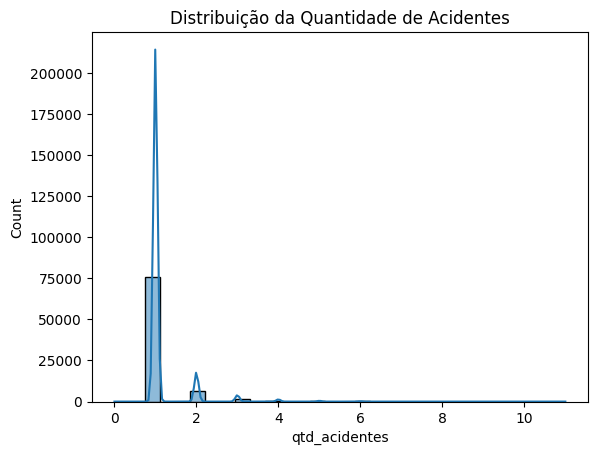

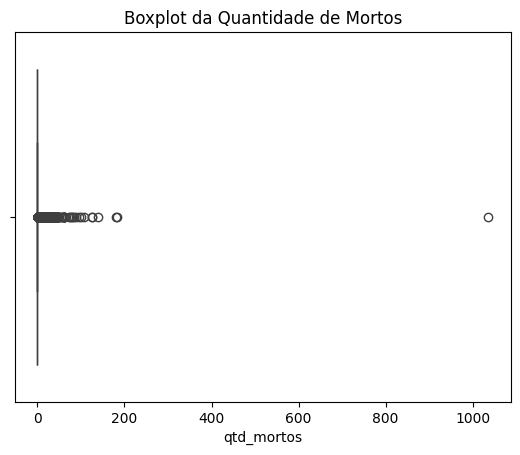

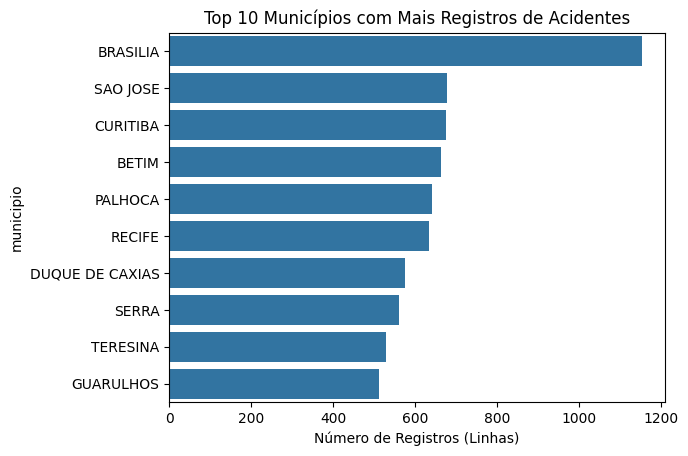

In [ ]:
# Análise de Variáveis Numéricas
print("\nEstatísticas Descritivas das variáveis numéricas:")
display(df.describe())

# Histograma da quantidade de acidentes
plt.title('Distribuição da Quantidade de Acidentes')
sns.histplot(df['qtd_acidentes'], bins=30, kde=True)
plt.show()

# Boxplot da quantidade de mortos (ótimo para ver outliers)
plt.title('Boxplot da Quantidade de Mortos')
sns.boxplot(x=df['qtd_mortos'])
plt.show()

# Análise de Variáveis Categóricas
# Top 10 municípios com mais registros de acidentes
top_10_municipios = df['municipio'].value_counts().nlargest(10)
plt.title('Top 10 Municípios com Mais Registros de Acidentes')
sns.barplot(y=top_10_municipios.index, x=top_10_municipios.values)
plt.xlabel('Número de Registros (Linhas)')
plt.show()


Matriz de Correlação:


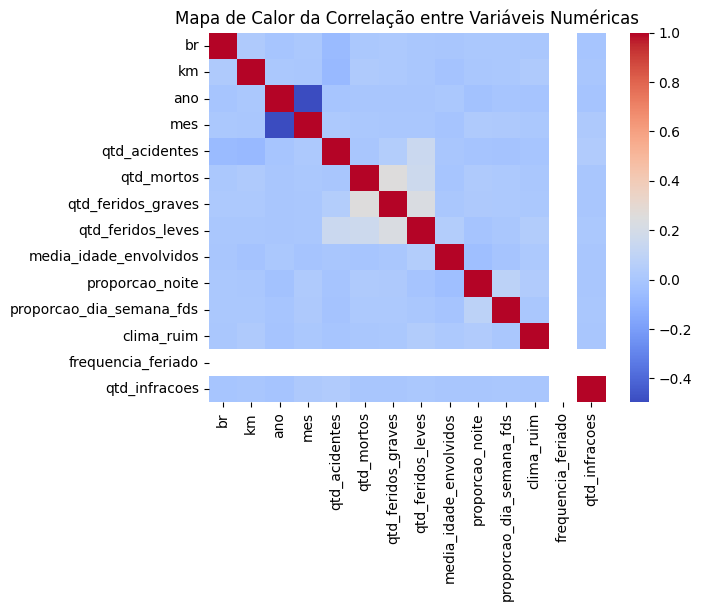

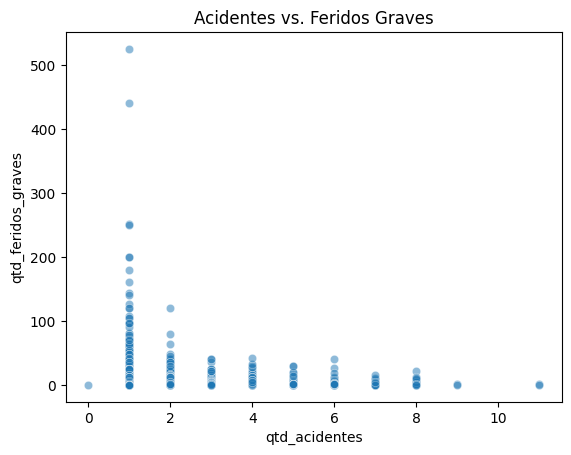

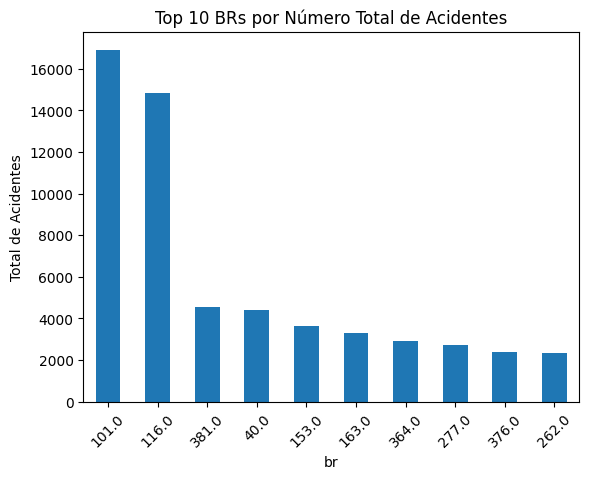

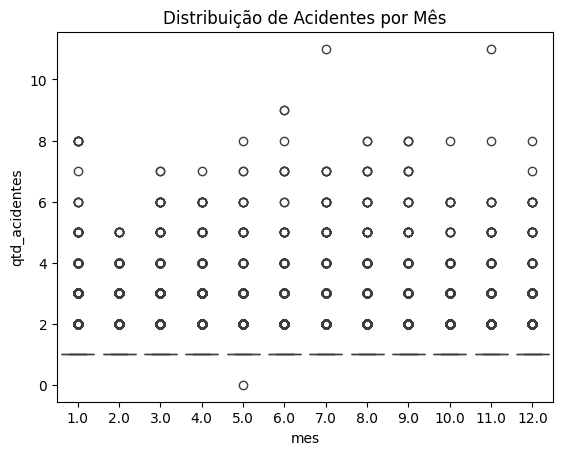

In [ ]:
# 1. Matriz de Correlação entre variáveis numéricas
print("\nMatriz de Correlação:")
correlation_matrix = df.select_dtypes(include=np.number).corr()
plt.title('Mapa de Calor da Correlação entre Variáveis Numéricas')
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm') # annot=True se tiver poucas variáveis
plt.show()

# 2. Scatter plot: Relação entre quantidade de acidentes e de feridos graves
plt.title('Acidentes vs. Feridos Graves')
sns.scatterplot(x='qtd_acidentes', y='qtd_feridos_graves', data=df, alpha=0.5)
plt.show()

# 3. Bar plot: Total de acidentes por BR
total_acidentes_br = df.groupby('br')['qtd_acidentes'].sum().sort_values(ascending=False).nlargest(10)
plt.title('Top 10 BRs por Número Total de Acidentes')
total_acidentes_br.plot(kind='bar')
plt.ylabel('Total de Acidentes')
plt.xticks(rotation=45)
plt.show()

# Boxplot para análise temporal: Acidentes por mês
plt.title('Distribuição de Acidentes por Mês')
sns.boxplot(x='mes', y='qtd_acidentes', data=df)
plt.show()